In [1]:
import classifier_wlan_utils as utils
import importlib
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import time

/home/mcamelo/anaconda3/envs/traffic/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mcamelo/anaconda3/envs/traffic/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mcamelo/anaconda3/envs/traffic/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mcamelo/anaconda3/envs/traffic/lib

In [2]:
importlib.reload(utils)
kernel_size = 2
dilation_depth = 6
n_filters = 50

In [3]:
seed = 42
task = "app-type"
label = utils.labels[task]
#print("Num classes in that label: ", num_classes)
num_iq_seq = 10000
padding = 'post'
dataset_folder = '../../dataset/waveforms/'
load_model=True
load_dir='../../models/'

In [4]:
num_classes = 2
print("Label id: ", label)
print("Classes: ", num_classes)
dataset_filename = 'waveforms_16042020_2G_n_6_mobile_app_reduced_app-type_2_classes_balanced.mat'
X_2classes, Y_2classes = utils.get_xy(dataset_folder,dataset_filename, num_iq_seq, padding, label, num_classes)

Label id:  2
Classes:  2
Reading raw X and Y from file


100%|██████████| 84132/84132 [02:00<00:00, 696.55it/s]


Padding/Truncating sequence


100%|██████████| 84132/84132 [00:06<00:00, 12881.72it/s]


Oneshot labels


In [5]:
load_file = '30042020071946_app_type_2_classes_saved_wavenet_clasifier'
model_apptype_2_classes  =  utils.WaveNetClassifier((2,num_iq_seq), (num_classes,), kernel_size = 2, dilation_depth = 6, n_filters = 32, task = 'classification', regression_range = None, load = load_model, load_dir = load_dir, load_file= load_file)

In [6]:
#model_apptype_2_classes.get_model().summary()

84132/84132 [==============================] - 180s 2ms/step
[1.5288202199640895, 0.7726311087608337]


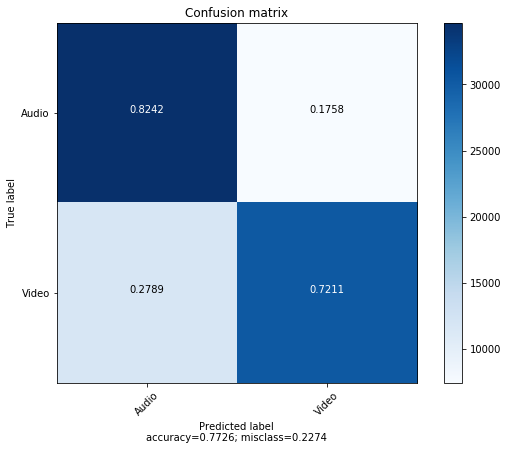

[[34670  7396]
 [11733 30333]]
[[0.41209052 0.08790948]
 [0.13945942 0.36054058]]


In [7]:
results = model_apptype_2_classes.evaluate(X_2classes, Y_2classes)
print(results)
Y_pred=np.argmax(model_apptype_2_classes.predict(X_2classes),1)
Y_true=np.argmax(Y_2classes,1)
utils.plot_confusion_matrix_mc(Y_true, Y_pred, ["Audio","Video"], "02052020_conf_matrix_test_app-type_2_classes.pdf")
del X_2classes
del Y_2classes
del model_apptype_2_classes

In [8]:
num_classes = 3
print("Label id: ", label)
print("Classes: ", num_classes)
dataset_filename = 'waveforms_16042020_2G_n_6_mobile_app_reduced_app-type_3_classes_balanced.mat'
X_3classes, Y_3classes = utils.get_xy(dataset_folder,dataset_filename, num_iq_seq, padding, label, num_classes)

Label id:  2
Classes:  3
Reading raw X and Y from file


100%|██████████| 126198/126198 [02:39<00:00, 790.39it/s]


Padding/Truncating sequence


100%|██████████| 126198/126198 [00:12<00:00, 10222.87it/s]


Oneshot labels


In [9]:
load_file = '29042020153011_app_type_3_classes_saved_wavenet_clasifier'
model_apptype_3_classes  = utils.WaveNetClassifier((2,num_iq_seq), (num_classes,), kernel_size = 2, dilation_depth = 6, n_filters = 32, task = 'classification', regression_range = None, load = load_model, load_dir = load_dir, load_file= load_file)

In [10]:
#model_apptype_3_classes.get_model().summary()

126198/126198 [==============================] - 268s 2ms/step
[1.2967549095282587, 0.8278261423110962]


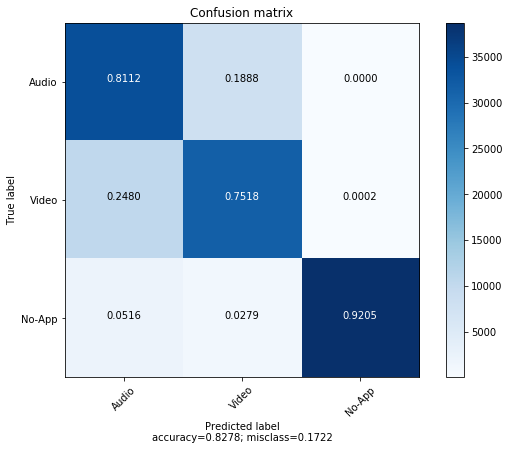

In [11]:
results = model_apptype_3_classes.evaluate(X_3classes, Y_3classes)
print(results)
Y_pred=np.argmax(model_apptype_3_classes.predict(X_3classes),1)
Y_true=np.argmax(Y_3classes,1)
utils.plot_confusion_matrix_mc(Y_true, Y_pred, ["Audio","Video", "No-App"], "02052020_conf_matrix_test_app-type_3_classes.pdf")
del X_3classes
del Y_3classes
del model_apptype_3_classes

In [12]:
num_classes = 4
print("Label id: ", label)
print("Classes: ", num_classes)
dataset_filename = 'waveforms_16042020_2G_n_6_mobile_app_reduced_app-type_balanced.mat'
X_4classes, Y_4classes = utils.get_xy(dataset_folder,dataset_filename, num_iq_seq, padding, label, num_classes)

Label id:  2
Classes:  4
Reading raw X and Y from file


100%|██████████| 167632/167632 [03:35<00:00, 779.43it/s]


Padding/Truncating sequence


100%|██████████| 167632/167632 [00:21<00:00, 7628.14it/s]


Oneshot labels


In [13]:
load_file = '29042020211648_app_type_4_classes_saved_wavenet_clasifier'
model_apptype_4_classes  = utils.WaveNetClassifier((2,num_iq_seq), (num_classes,), kernel_size = 2, dilation_depth = 6, n_filters = 32, task = 'classification', regression_range = None, load = load_model, load_dir = load_dir, load_file= load_file)

In [14]:
#model_apptype_4_classes.get_model().summary()

167632/167632 [==============================] - 356s 2ms/step
[1.0769911039471811, 0.8087179064750671]


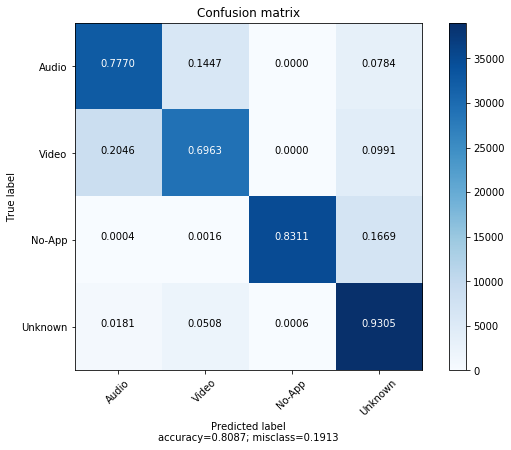

In [15]:
results = model_apptype_4_classes.evaluate(X_4classes, Y_4classes)
print(results)
Y_pred=np.argmax(model_apptype_4_classes.predict(X_4classes),1)
Y_true=np.argmax(Y_4classes,1)
utils.plot_confusion_matrix_mc(Y_true, Y_pred, ["Audio","Video", "No-App", "Unknown"], "02052020_conf_matrix_test_app-type_4_classes.pdf")
del X_4classes
del Y_4classes
del model_apptype_4_classes

In [16]:
seed = 42
task = "app"
label = utils.labels[task]
#num_classes = utils.classes[task]
print("Label id: ", label)

Label id:  3


In [17]:
num_classes = 6
print("Label id: ", label)
print("Classes: ", num_classes)
dataset_filename = 'waveforms_16042020_2G_n_6_mobile_app_reduced_app_6_classes_balanced.mat'
X, Y = utils.get_xy(dataset_folder,dataset_filename, num_iq_seq, padding, label, num_classes)

Label id:  3
Classes:  6
Reading raw X and Y from file


100%|██████████| 61374/61374 [01:15<00:00, 814.93it/s]


Padding/Truncating sequence


100%|██████████| 61374/61374 [00:03<00:00, 15387.29it/s]


Oneshot labels


In [18]:
load_file = '30042020110539_app_6_classes_saved_wavenet_clasifier'
model  = utils.WaveNetClassifier((2,num_iq_seq), (num_classes,), kernel_size = 2, dilation_depth = 6, n_filters = 32, task = 'classification', regression_range = None, load = load_model, load_dir = load_dir, load_file= load_file)

In [19]:
#model_app_6_classes.get_model().summary()

61374/61374 [==============================] - 130s 2ms/step
[3.52136457800636, 0.5326685309410095]


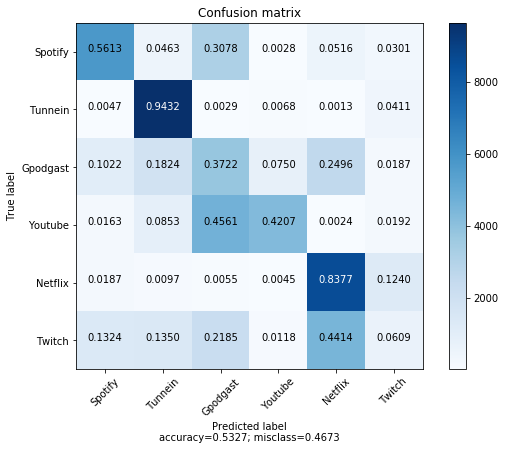

In [20]:
results = eval_and_plot_cm_4_model(model, X, Y, cm_filename, target_names)
print(results)
Y_pred=np.argmax(model_app_6_classes.predict(X_6classes),1)
Y_true=np.argmax(Y_6classes,1)
utils.plot_confusion_matrix_mc(Y_true, Y_pred, ["Spotify","Tunnein","Gpodgast", "Youtube","Netflix", "Twitch"], "02052020_conf_matrix_test_app_6_classes.pdf")

del X_6classes
del Y_6classes
del model_app_6_classes

In [21]:
seed = 42
task = "frames"
label = utils.labels[task]
num_classes = utils.classes[task]
print("Label id: ", label)
print("Classes: ", num_classes)

Label id:  0
Classes:  3


In [22]:
dataset_filename = 'waveforms_24042020_2G_n_6_mobile_app_full.mat'
X_full_app, Y_full_app = utils.get_xy(dataset_folder,dataset_filename, num_iq_seq, padding, label, num_classes)

Reading raw X and Y from file


100%|██████████| 417651/417651 [08:32<00:00, 815.64it/s]


Padding/Truncating sequence


100%|██████████| 417651/417651 [16:36<00:00, 419.30it/s] 


Oneshot labels


In [23]:
load_file = '02052020133715_frames_saved_wavenet_clasifier'
model_app_full  = utils.WaveNetClassifier((2,num_iq_seq), (num_classes,), kernel_size = 2, dilation_depth = 6, n_filters = 32, task = 'classification', regression_range = None, load = load_model, load_dir = load_dir, load_file= load_file)

In [24]:
#model_app_full.get_model().summary()

417651/417651 [==============================] - 1177s 3ms/step
[0.16653294375034988, 0.9877936244010925]


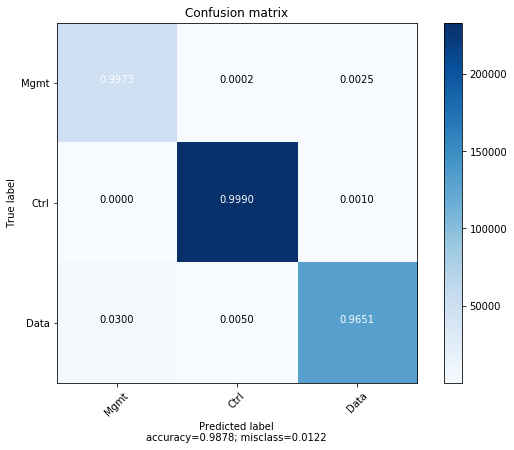

In [25]:
results = model_app_full.evaluate(X_full_app, Y_full_app)
print(results)
Y_pred=np.argmax(model_app_full.predict(X_full_app),1)
Y_true=np.argmax(Y_full_app,1)
utils.plot_confusion_matrix_mc(Y_true, Y_pred, ["Mgmt", "Ctrl", "Data"], "02052020_conf_matrix_test_frames_classes.pdf")
del X_full_app
del Y_full_app
del model_app_full